<br><br>
<font size = '6'><b>Discrete Time Fourier Transformation (DTFT)</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
        Prof. Seungchul Lee<br>
        iSystems Design Lab<br>UNIST<br>http://isystems.unist.ac.kr/
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>


#  1. DFT and DTFT

- DTFT is the Fourier transform of choice for analyzing infinite-length signals and systems
- Useful for conceptual, but not Matlab friendly (infinitely-long vectors)
- We will derive DTFT as the limit of the DFT as the signal length $N \rightarrow \infty$

$$\large \omega = \frac{2\pi}{N}k$$

<img src="./image_files/centered_DFT.png" style="border:1px solid black" width = 700>

<img src="./image_files/limit_01.png" style="border:1px solid black" width = 700>

<img src="./image_files/limit_02.png" style="border:1px solid black" width = 700>

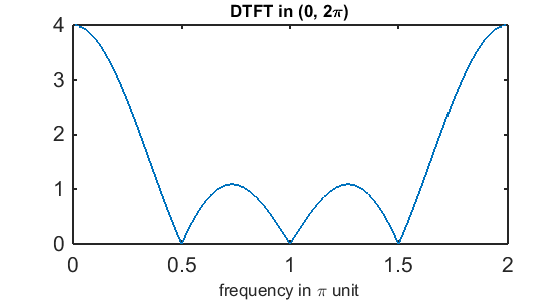

In [11]:
%plot -s 560,300

% dtft from definition
n = 0:3;
x = [1 1 1 1];

N = 200;

w2 = [0:N]*2*pi/N; w = w2(1:end-1);
Xdtft = sin(2*w)./sin(w/2).*exp(-1j*3*w/2);

plot(w/pi,abs(Xdtft))
xlabel('frequency in \pi unit','fontsize',8), 
title('DTFT in (0, 2\pi)','fontsize',8)

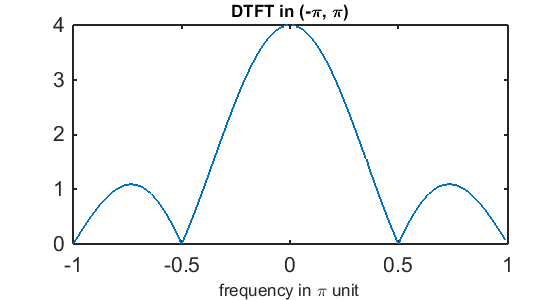

In [8]:
k = [0:N/2-1 -N/2:-1];
w = k*2*pi/N;
ws = fftshift(w);
Xdtfts = fftshift(Xdtft);

plot(ws/pi,abs(Xdtfts))
xlabel('frequency in \pi unit','fontsize',8), 
title('DTFT in (-\pi, \pi)','fontsize',8)

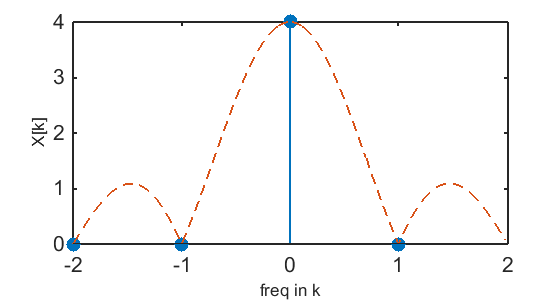

In [14]:
x = [1,1,1,1];
N = length(x);

k = [0:N/2-1 -N/2:-1];
ks = fftshift(k);

X = dft(x,N);
Xs = fftshift(X);

stem(ks,abs(Xs),'filled'), 
xlabel('freq in k','fontsize',8), ylabel('X[k]','fontsize',8), 
xlim([-N/2,N/2]), hold on
plot(ws*N/(2*pi),abs(Xdtfts),'--'), hold off

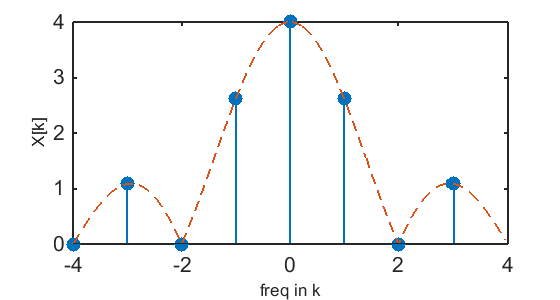

In [15]:
x = [1,1,1,1,zeros(1,4)];
N = length(x);

k = [0:N/2-1 -N/2:-1];
ks = fftshift(k);

X = dft(x,N);
Xs = fftshift(X);

stem(ks,abs(Xs),'filled'), 
xlabel('freq in k','fontsize',8), ylabel('X[k]','fontsize',8), 
xlim([-N/2,N/2]), hold on
plot(ws*N/(2*pi),abs(Xdtfts),'--'), hold off

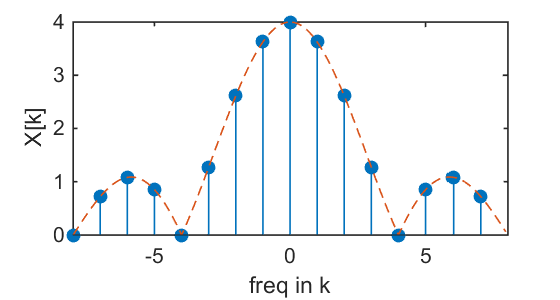

In [5]:
x = [1,1,1,1,zeros(1,12)];
N = length(x);

k = [0:N/2-1 -N/2:-1];
ks = fftshift(k);

X = dft(x,N);
Xs = fftshift(X);

stem(ks,abs(Xs),'filled'),
xlabel('freq in k'), ylabel('X[k]'), xlim([-N/2,N/2]), hold on
plot(ws*N/(2*pi),abs(Xdtfts),'--'), hold off

In [2]:
% DTFT using the output of FFT (or DFT)

x = [1,1,1,1,zeros(1,2^6-4)];
N = length(x);

k = [0:N/2-1 -N/2:-1];
ks = fftshift(k);

X = dft(x,N);
Xs = fftshift(X);

stem(ks,abs(Xs),'filled','markersize',3)
xlabel('freq in k'), ylabel('X[k]'), xlim([-N/2,N/2]), hold on
plot(ws*N/(2*pi),abs(Xdtfts),'--'), hold off

Undefined function or variable 'ws'.

<img src="./image_files/DTFT.png" style="border:1px solid black" width = 700>

## 1.1. Analytic form of DTFT (exact transformation)

$$\large x[n]=(0.5)^nu[n] \qquad \leftrightarrow \qquad X(e^{j\omega}) = \frac{e^{j\omega}}{e^{j\omega}-0.5}$$

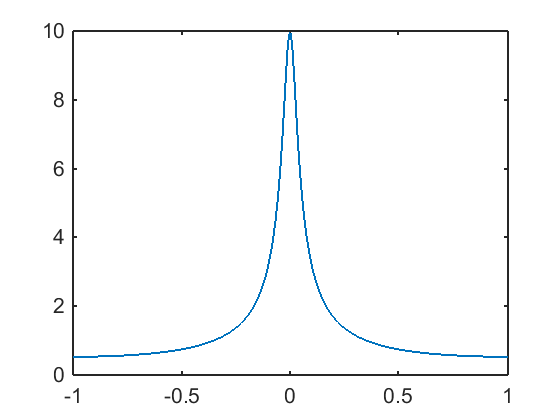

In [4]:
w = linspace(-pi,pi,2^8);
X = exp(1j*w)./(exp(1j*w) - 0.9);
plot(w/pi,abs(X))

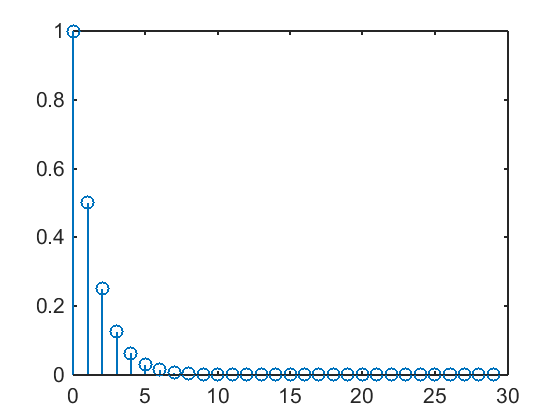

In [6]:
N = 30;
n = 0:N-1;
x = zeros(1,N);
for i = 1:N
    x(i) = 0.5^(i-1);
end
stem(n,x)

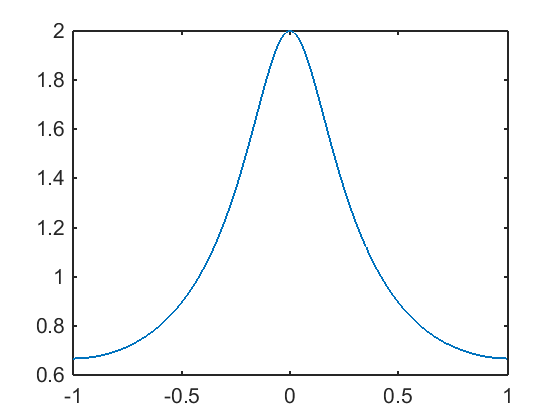

In [9]:
w = linspace(-1,1,2^8)*pi;
X = exp(-1j*(w'*n))*x';

plot(w/pi,abs(X))

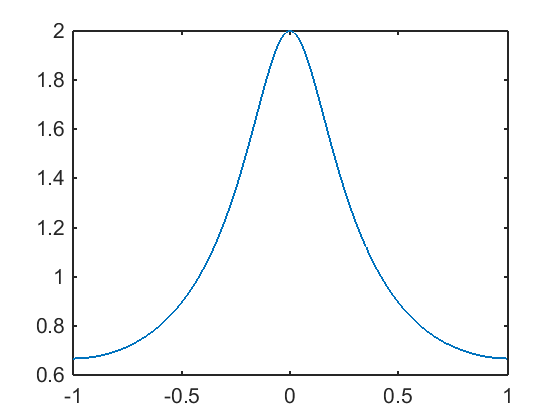

In [11]:
X = dtft(x,n,w);
plot(w/pi,abs(X))

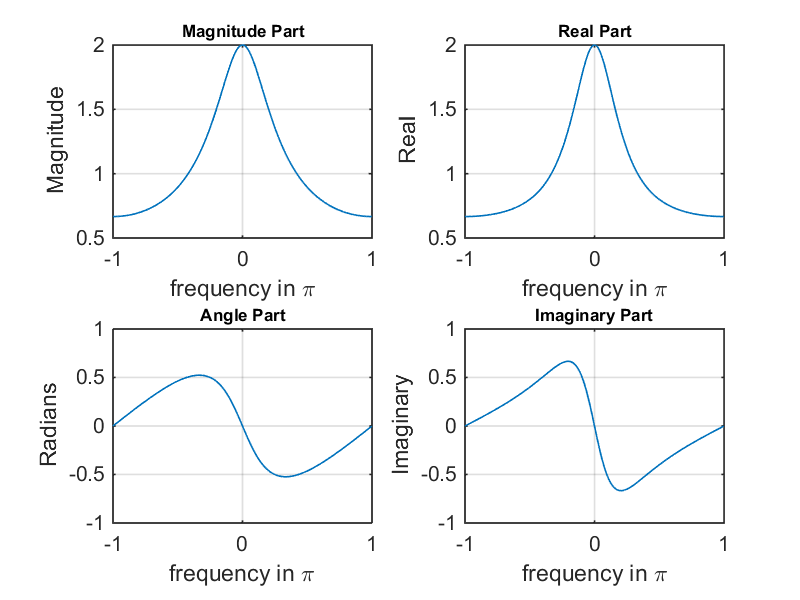

In [7]:
%plot -s 800,600

N = 500;
w2 = [-1:1/N:1]*pi;       
w = w2(1:end-1);

% closed form of DTFT
X = exp(1j*w)./(exp(1j*w) - 0.5*ones(size(w)));

magX = abs(X);  angX = angle(X);
realX = real(X);    imagX = imag(X);

subplot(2,2,1); plot(w/pi,magX); grid
xlabel('frequency in \pi'); title('Magnitude Part','fontsize',8); ylabel('Magnitude')

subplot(2,2,3); plot(w/pi,angX); grid
xlabel('frequency in \pi'); title('Angle Part','fontsize',8); ylabel('Radians')

subplot(2,2,2); plot(w/pi,realX); grid
xlabel('frequency in \pi'); title('Real Part','fontsize',8); ylabel('Real')

subplot(2,2,4); plot(w/pi,imagX); grid
xlabel('frequency in \pi'); title('Imaginary Part','fontsize',8); ylabel('Imaginary')


## 1.2. DTFT of a numerical computation (using a definition)

### Example 1

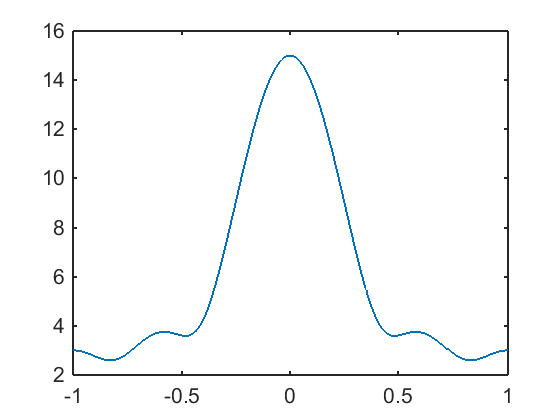

In [13]:
x = [0,1,2,3,4,5];
n = -2:3;
X = dtft(x,n,w);
plot(w/pi,abs(X))

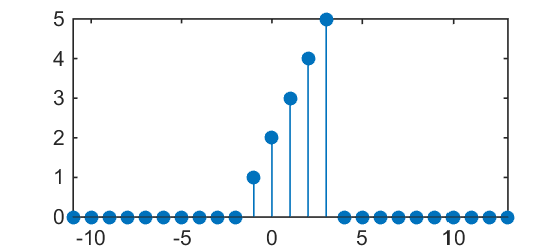

In [8]:
%plot -s 560,250
% in MATLAB, we represent sequences and indices as row vectors

n = -1:3;
x = 1:5;                                % sequence x(n)

% just for a nice plot
m = 10;                                 
stem([n(1)-m:n(end)+m],[zeros(1,m),x,zeros(1,m)],'filled'), axis tight  

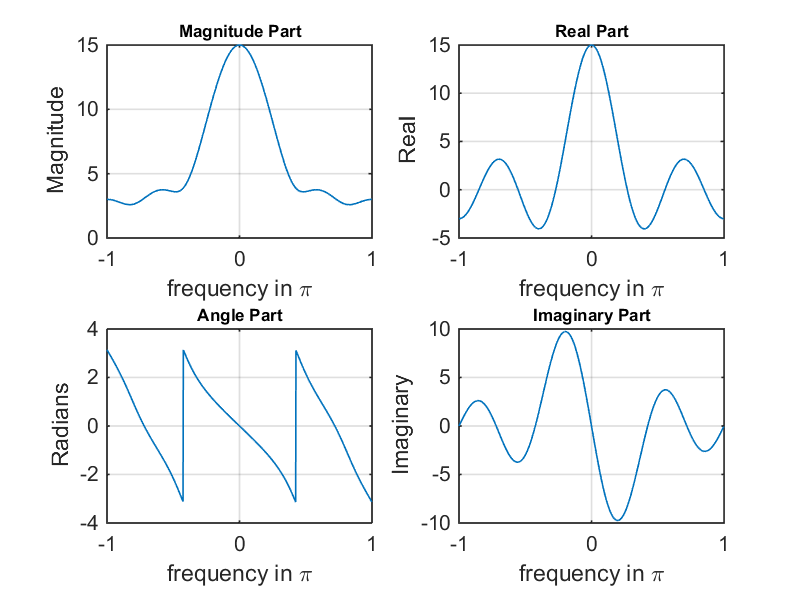

In [9]:
%plot -s 800,600

%% DTFT code
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
N = 500;
k = -N:N-1; w = (pi/N)*k;              
X = x * (exp(-1j*pi/500)).^(n'*k);      % DTFT using matrix-vector product
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% plots
magX = abs(X);  angX = angle(X);
realX = real(X);    imagX = imag(X);

subplot(2,2,1); plot(w/pi,magX); grid
xlabel('frequency in \pi'); title('Magnitude Part','fontsize',8); ylabel('Magnitude')

subplot(2,2,3); plot(w/pi,angX); grid
xlabel('frequency in \pi'); title('Angle Part','fontsize',8); ylabel('Radians')

subplot(2,2,2); plot(w/pi,realX); grid
xlabel('frequency in \pi'); title('Real Part','fontsize',8); ylabel('Real')

subplot(2,2,4); plot(w/pi,imagX); grid
xlabel('frequency in \pi'); title('Imaginary Part','fontsize',8); ylabel('Imaginary')

### Example 2

$$\large x[n] = {\left(0.5e^{(j\pi /3)}\right)}^n$$

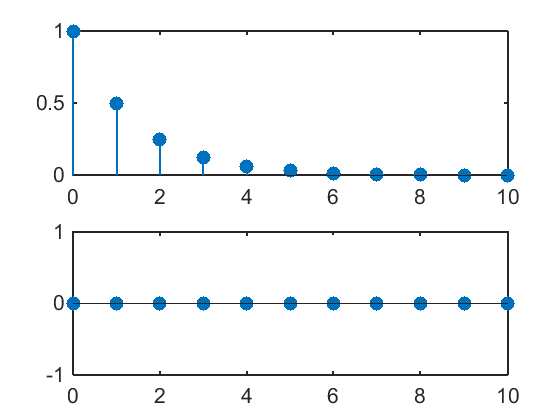

In [20]:
%plot -s 560,420
n = 0:10;
x = (0.5).^n;

subplot(2,1,1),  stem(n,real(x),'filled')
subplot(2,1,2),  stem(n,imag(x),'filled')

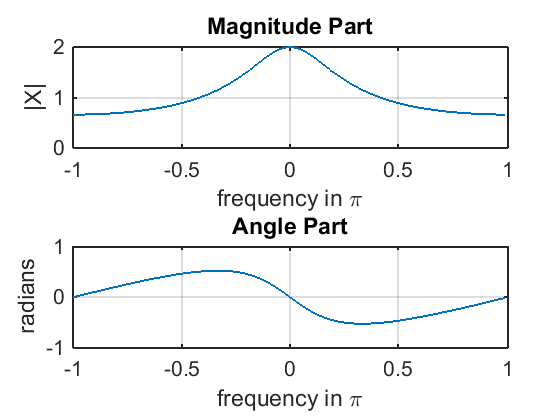

In [21]:
N = 100;
k = -N:N-1; w = (pi/N)*k;       

X = x*(exp(-1j*pi/N)).^(n'*k);    % DTFT

magX = abs(X); angX = angle(X);

subplot(2,1,1); plot(w/pi,magX);grid
xlabel('frequency in \pi'); ylabel('|X|')
title('Magnitude Part')

subplot(2,1,2); plot(w/pi,angX);grid
xlabel('frequency in \pi'); ylabel('radians')
title('Angle Part')

# 2. Numerical DTFT Computation

```octave
function X = dtft(x,n,w)
% X = dtft(x, n, w)
%
% X = DTFT values computed at w frequencies
% x = finite duration sequence over n
% n = sample position vector
% w = frequency location vector

X = exp(-1j*(w'*n))*x';

end
```

### DTFT of the unit pulse

$$
p[n]\, =\, \begin{cases}
1\quad -M\, \leq\, n\, \leq \, M\\
0\quad \text{otherwise}
\end{cases}
$$

$$P(\omega)\, =\, \sum_{n=-\infty}^\infty \, p[n]\, e^{-j\omega n}\, =\, \sum_{n=-M}^M \,e^{-j\omega n}\, = \, \frac{e^{j\omega M}\, -\, e^{-j\omega (M+1)}}{1\, -\, e^{-j\omega}}\, =\, \frac{e^{-j\omega /2}\left(e^{j\omega \frac{2M+1}{2}}\, -\, e^{-j\omega \frac{2M+1}{2}}\right)}{e^{-j\omega /2} \left(e^{j\omega /2}\, -\, e^{-j\omega /2}\right)}\, =\, \frac{2j\, \sin \left(\omega \frac{2M+1}{2} \right)}{2j\, \sin \left(\frac{\omega}{2} \right)}$$




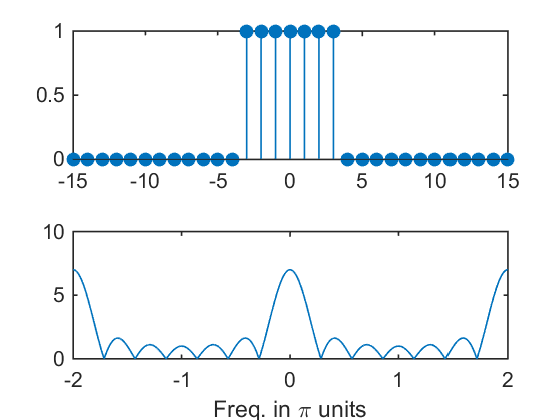

In [12]:
%plot -s 560,420

x = [1 1 1 1 1 1 1];
n = -3:3;
w = linspace(-2,2,2^10)*pi;

X = dtft(x,n,w);

xd = zeros(1,31);
nd = -15:15;
[y,ny] = sigadd(xd,nd,x,n);

subplot(2,1,1), stem(ny,y,'filled')
subplot(2,1,2), plot(w/pi,abs(X)), xlabel('Freq. in \pi units')

### DTFT of triangle

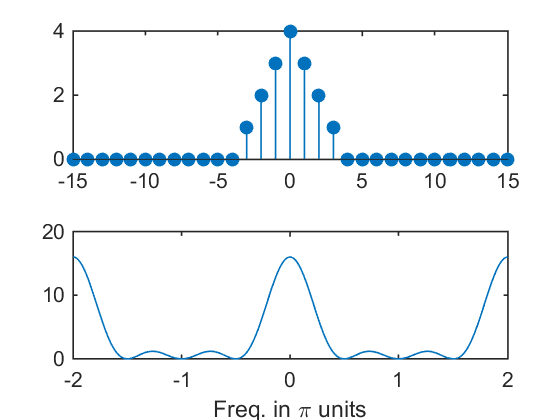

In [13]:
%plot -s 560,420

x = [1 2 3 4 3 2 1];
n = -3:3;
w = linspace(-2,2,2^10)*pi;

X = dtft(x,n,w);

xd = zeros(1,31);
nd = -15:15;
[y,ny] = sigadd(xd,nd,x,n);

subplot(2,1,1), stem(ny,y,'filled')
subplot(2,1,2), plot(w/pi,abs(X)), xlabel('Freq. in \pi units')

### DTFT of pulse

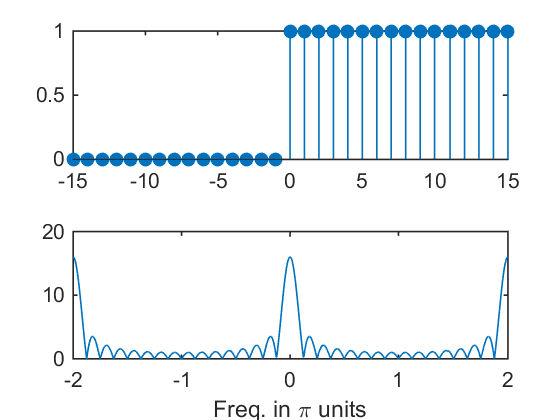

In [14]:
n = 0:15;
x = ones(1,length(n));
w = linspace(-2,2,2^10)*pi;

X = dtft(x,n,w);

xd = zeros(1,31);
nd = -15:15;
[y,ny] = sigadd(xd,nd,x,n);

subplot(2,1,1), stem(ny,y,'filled')
subplot(2,1,2), plot(w/pi,abs(X)), xlabel('Freq. in \pi units')

### DTFT of a one-sided exponential

$$ \large h[n] = \alpha ^n u[n] \qquad \longleftrightarrow \qquad H(\omega) = \frac{1}{1-\alpha e^{-j\omega}}$$

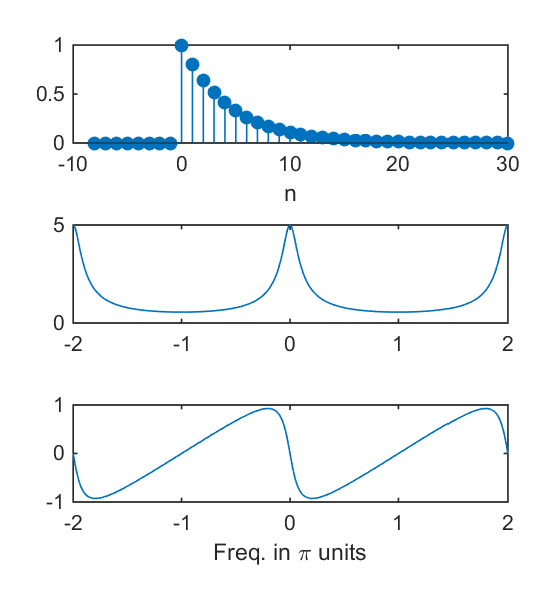

In [15]:
%plot -s 560,600

N = 30;

x = zeros(1,N);
for i = 1:N
    x(i) = 0.8^(i-1);
end

n = 0:N-1;
w = linspace(-2,2,2^10)*pi;

X = dtft(x,n,w);

nd = -8:N;
xd = zeros(size(nd));
[y,ny] = sigadd(xd,nd,x,n);

subplot(3,1,1), stem(ny,y,'filled'), xlabel('n')
subplot(3,1,2), plot(w/pi,abs(X)), 
subplot(3,1,3), plot(w/pi,phase(X)), xlabel('Freq. in \pi units')

# 3. Property: 

### DTFT and Modulation

$$ e^{-j\omega_0 n}x[n] \qquad \longleftrightarrow \qquad X(\omega - \omega_0) $$

$$ e^{-j\omega_0 n}x[n] =(-1)^n x[n] \qquad \text{when} \quad \omega_0 = \frac{2\pi}{N}\frac{N}{2}=\pi $$

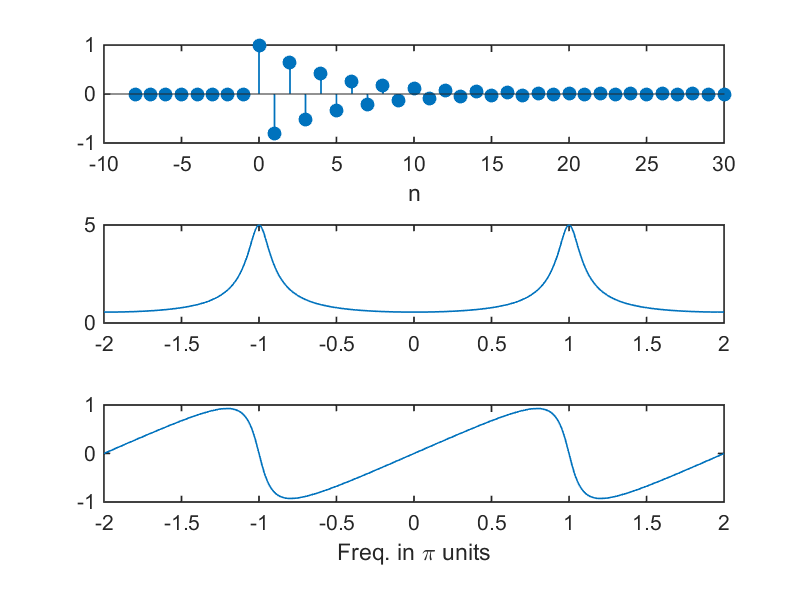

In [16]:
%plot -s 800,600

N = 30;
nd = -8:N;
xd = zeros(size(nd));

x = zeros(1,N);
for i = 1:N
    x(i) = (-0.8)^(i-1);
end
n = 0:N-1;
%w = linspace(-1,1,2^10)*pi;
w = linspace(-2,2,2^10)*pi;

X = dtft(x,n,w);

subplot(3,1,1), stem(nd,sigadd(xd,nd,x,n),'filled'), xlabel('n')
subplot(3,1,2), plot(w/pi,abs(X)), 
subplot(3,1,3), plot(w/pi,phase(X)), xlabel('Freq. in \pi units')

### DTFT and Time Shift

$$ x[n-m] \qquad \longleftrightarrow \qquad e^{-j\omega m}X(\omega) $$

- same amplitude
- phase changed (linearly $-\angle\omega m$)

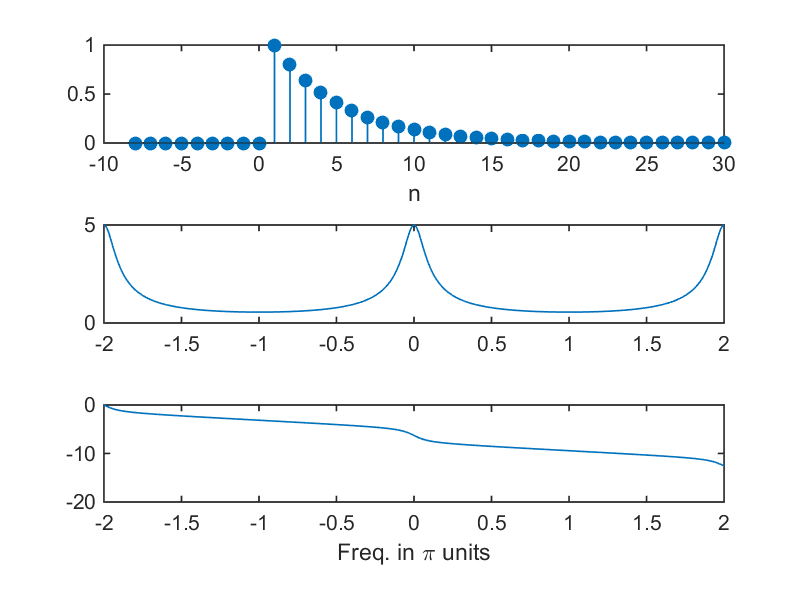

In [17]:
%plot -s 800,600
N = 30;
nd = -8:N;
xd = zeros(size(nd));

x = zeros(1,N);
for i = 1:N
    x(i) = 0.8^(i-1);
end

m = 1;          % m = 1 => one sample delay or shift
n = 0+m:N-1+m;
[y,ny] = sigadd(xd,nd,x,n);

% w = linspace(-1,1,2^10)*pi;
w = linspace(-2,2,2^10)*pi;

X = dtft(x,n,w);

subplot(3,1,1), stem(ny,y,'filled'), xlabel('n')
subplot(3,1,2), plot(w/pi,abs(X)), 
subplot(3,1,3), plot(w/pi,phase(X)), xlabel('Freq. in \pi units')

# 4. Filters

## Ideal lowpass filter and discrete-time sinc function

__Impulse Response of the Ideal Lowpass Filter__

$$ h[n] = 2\omega_c \frac{sin(\omega_c n)}{\omega_c n} \qquad \longleftrightarrow \qquad 
H(\omega) = \begin{cases} 1 & -\omega_c \leq \omega \leq \omega_c \\ 
0 & \mbox{otherwise}  \end{cases}  $$


$$h[n]\, =\, \int_{-\pi}^{\pi} H(\omega)\, e^{j\omega n} \frac{d\omega}{2\pi}\, =\, \int_{-\omega _c}^{\omega _c} e^{j\omega n} \frac{d\omega}{2\pi}\, = \, \frac{e^{j\omega _c n}\, -\, e^{-j\omega _c n}}{jn}\, = 2\omega _c \frac{\sin(\omega _c n)}{\omega _c n}$$


$$\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}$$

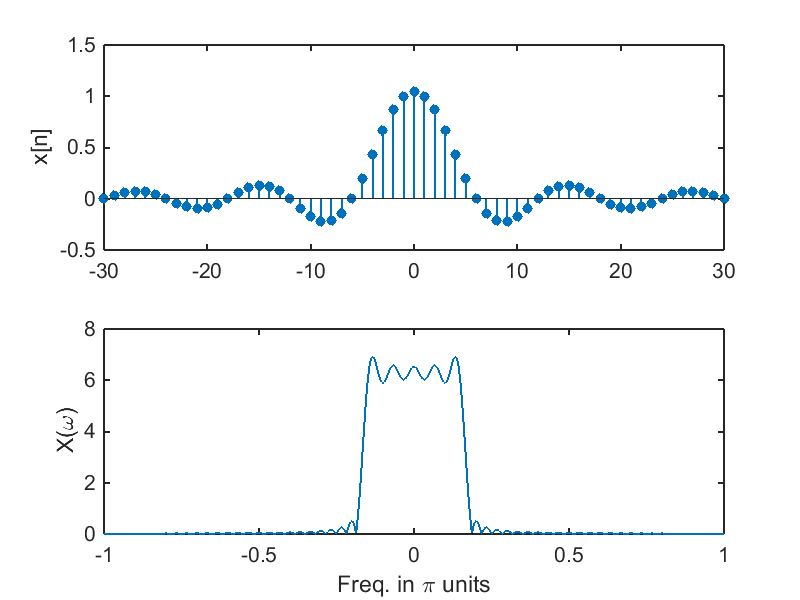

In [1]:
%plot -s 800,600

wc = pi/6;

N = 30;
n = -N:N;

h = zeros(1,length(n));
for i = 1:length(n)
    h(i) = 2*wc*sinc(1/pi*wc*(i-N-1));
end

w = linspace(-1,1,2^10)*pi;
%w = linspace(0,2,2^10)*pi;

X = dtft(h,n,w);

subplot(2,1,1), stem(n,h,'filled','markersize',4), ylabel('x[n]')
subplot(2,1,2), plot(w/pi,abs(X)), ylabel('X(\omega)')
xlabel('Freq. in \pi units'), ylabel('X(\omega)')

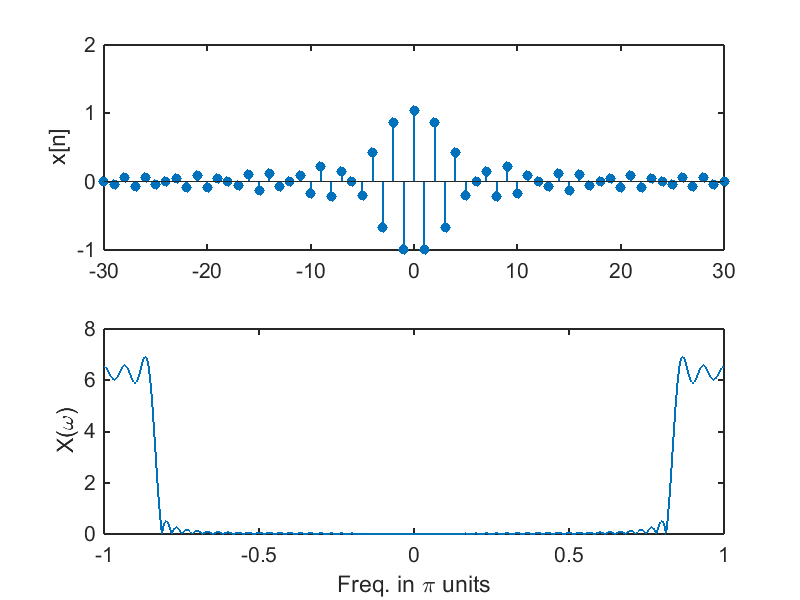

In [2]:
%plot -s 800,600

wc = pi/6;

N = 30;
n = -N:N;

d = zeros(1,length(n));
h = zeros(1,length(n));
d(N+1) = d(N+1) + 1;

for i = 1:length(n)
    h(i) =  (-1)^(i-N-1)*2*wc*sinc(1/pi*wc*(i-N-1));
end

%h = sigadd(d,n,-h,n);

w = linspace(-1,1,2^12)*pi;
%w = linspace(0,2,2^10)*pi;

X = dtft(h,n,w);

subplot(2,1,1), stem(n,h,'filled','markersize',4), ylabel('x[n]')
subplot(2,1,2), plot(w/pi,abs(X)), ylabel('X(\omega)')
xlabel('Freq. in \pi units'), ylabel('X(\omega)')

## Linear Filters: Low-Pass

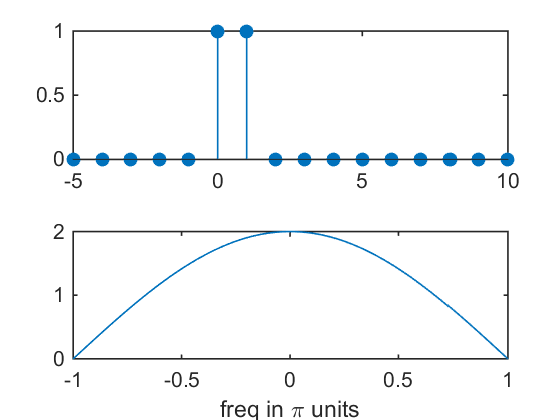

In [20]:
%plot -s 560,420
nd = -5:10;
hd = zeros(1,length(nd));

N = 2;
h = ones(1,N);
n = 0:N-1;

w = linspace(-1,1,2^10)*pi;
X = dtft(h,n,w);

[y,ny] = sigadd(hd,nd,h,n);
subplot(2,1,1), stem(ny,y,'filled')
subplot(2,1,2), plot(w/pi,abs(X)), xlabel('freq in \pi units')

## Linear Filters: High-Pass

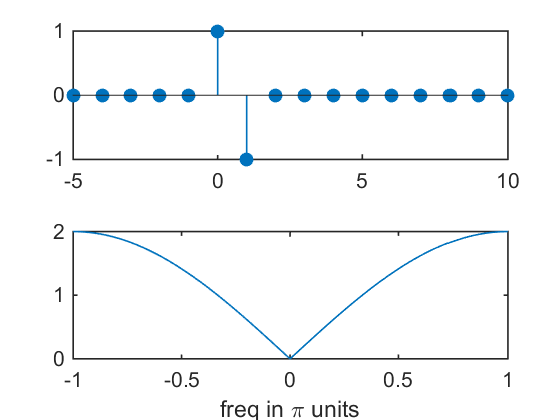

In [21]:
%plot -s 560,420
nd = -5:10;
hd = zeros(1,length(nd));

N = 2;
h = [1 -1];
n = 0:N-1;

w = linspace(-1,1,2^10)*pi;
X = dtft(h,n,w);

[y,ny] = sigadd(hd,nd,h,n);
subplot(2,1,1), stem(ny,y,'filled')
subplot(2,1,2), plot(w/pi,abs(X)), xlabel('freq in \pi units')

## Linear Filters: Band-Pass

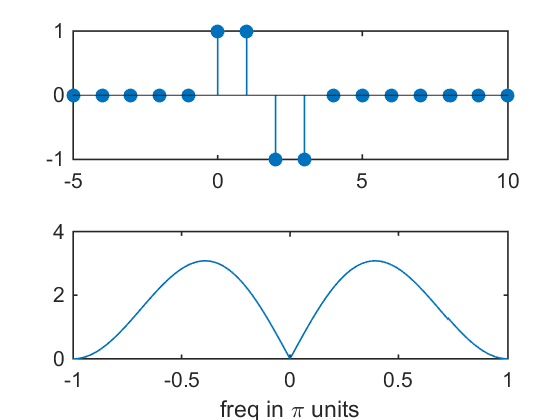

In [22]:
%plot -s 560,420
nd = -5:10;
hd = zeros(1,length(nd));

N = 4;
h = [1 1 -1 -1];
n = 0:N-1;

w = linspace(-1,1,2^10)*pi;
X = dtft(h,n,w);

[y,ny] = sigadd(hd,nd,h,n);
subplot(2,1,1), stem(ny,y,'filled')
subplot(2,1,2), plot(w/pi,abs(X)), xlabel('freq in \pi units')

## Linear Filters: Band-Stop

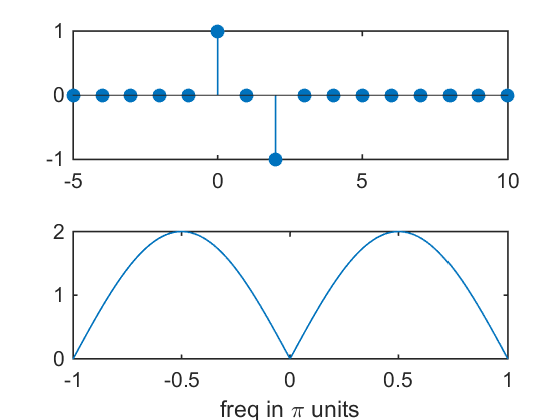

In [23]:
%plot -s 560,420
nd = -5:10;
hd = zeros(1,length(nd));

N = 3;
h = [1 0 -1];
n = 0:N-1;

w = linspace(-1,1,2^10)*pi;
X = dtft(h,n,w);

[y,ny] = sigadd(hd,nd,h,n);
subplot(2,1,1), stem(ny,y,'filled')
subplot(2,1,2), plot(w/pi,abs(X)), xlabel('freq in \pi units')

# 5. High-density spectrum and high-resolution spectrum

<br>
$$ 
\large x[n] = \cos(0.48 \pi n) + \cos(0.52 \pi n)$$

In [24]:
N = 100;
n = 0:N-1;
x = cos(0.48*pi*n) + cos(0.52*pi*n);

use only 10-point DFT of $x[n]$

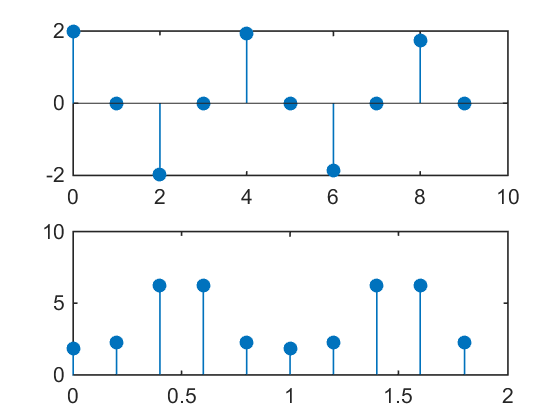

In [25]:
%plot -s 560,420

n1 = 0:9;
y1 = x(1:10);
Y1 = dft(y1,10);
k1 = n1;
w1 = 2*pi/10*k1;

subplot(2,1,1), stem(n1,y1,'filled')
subplot(2,1,2), stem(w1/pi,abs(Y1),'filled')

pad 90 zeros to obtain a dense spectrum

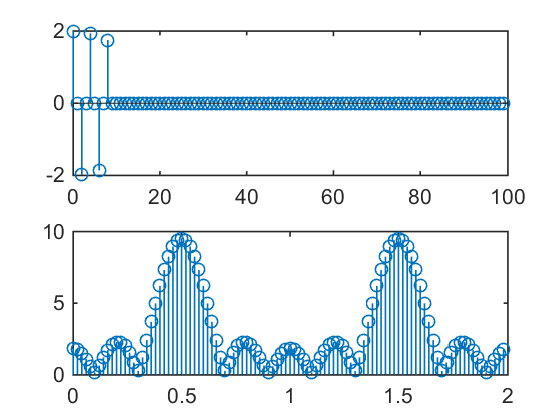

In [26]:
%plot -s 560,420

n2 = 0:99;
y2 = [x(1:10), zeros(1,90)];
Y2 = dft(y2,N);
k2 = n2;
w2 = 2*pi/100*k2;

subplot(2,1,1), stem(n2,y2)
subplot(2,1,2), stem(w2/pi,abs(Y2))

use 100 samples of $x[n]$

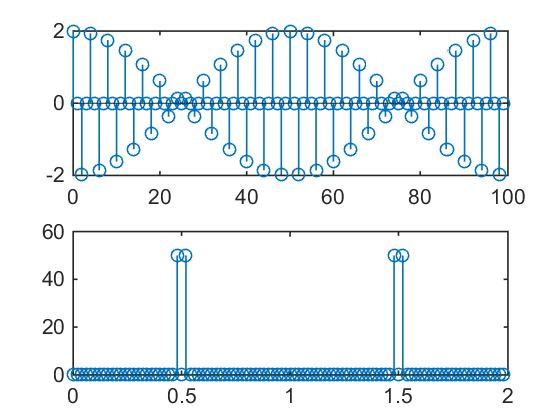

In [27]:
%plot -s 560,420

n3 = n;
y3 = x;
Y3 = dft(y3,100);
k3 = n3;
w3 = 2*pi/100*k3;

subplot(2,1,1), stem(n3,y3)
subplot(2,1,2), stem(w3/pi,abs(Y3))

** conclusion: **

padding more zeros to the 100-point sequence will result
in a smoother rendition of the spectrum but will not reveal any new information.

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>